# Quick look at the sophronia output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'


from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.evm.event_model                          import HitCollection

from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType

from IC.invisible_cities.reco import hits_functions as hif

from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio

from IC.invisible_cities.cities.components import track_blob_info_creator_extractor
from IC.invisible_cities.io.hits_io        import load_hits
from IC.invisible_cities.io.hits_io        import hits_from_df
from IC.invisible_cities.core              import system_of_units as units
from IC.invisible_cities.types.symbols     import HitEnergy
from IC.invisible_cities.evm.event_model   import HitCollection
from IC.invisible_cities.evm.event_model   import Cluster
from IC.invisible_cities.evm.event_model   import Hit
from IC.invisible_cities.types.ic_types    import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from collections import defaultdict

import matplotlib.cm as cm
from matplotlib.colors import Normalize

pd.set_option('display.max_rows', 200)

#import imageio

#import functions as func


# Set up cuts and drops here

In [56]:
q_cut = 8
drop_dist = [16,16]

cut_sensors       = beerfun.cut_over_Q   (q_cut, ['E', 'Ec'])
drop_sensors      = beerfun.drop_isolated(drop_dist, ['E', 'Ec'])

In [57]:
def cut_and_plot(df):
    for events in df.event.unique():
        evt_hdst = soph_hdst[soph_hdst.event == events]

        print('======================')
        print(f'EVENT {evt_hdst.event.unique()[0]}')
        print(f'Total energy {evt_hdst.Ec.sum():.2f} MeV')
        print('======================\n')

        # apply cuts and all that
        hits_cut = coref.timefunc(cut_sensors)(evt_hdst.copy())
        hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())

        print(f'Post cuts and drops:')
        print(f'Total energy {hits_drop.Ec.sum():.2f} MeV')

        fig, axes = plt.subplots(1, 3, figsize=(18, 4))

        hits = hits_drop
        # then applying transformations to convert to 'SiPM outputs'

        xx = np.arange(hits.X.min(), hits.X.max() + pitch, pitch)
        yy = np.arange(hits.Y.min(), hits.Y.max() + pitch, pitch)
        zz = hits.Z.unique()

        axes[0].hist2d(hits.X, hits.Y, bins=[xx, yy], weights=hits.Q, cmin=0.0001)#, cmap = 'Viridis');
        axes[0].set_xlabel('X (mm)');
        axes[0].set_ylabel('Y (mm)');

        axes[1].hist2d(hits.X, hits.Z, bins=[xx, zz], weights=hits.Q, cmin=0.0001)#, cmap = 'RdGy');
        axes[1].set_xlabel('X (mm)');
        axes[1].set_ylabel('Z (mm)');


        axes[2].hist2d(hits.Y, hits.Z, bins=[yy, zz], weights=hits.Q, cmin=0.0001)#, cmap = 'RdGy');
        axes[2].set_xlabel('Y (mm)');
        axes[2].set_ylabel('Z (mm)');

        fig.suptitle(f'event {events}')
        plt.show(fig)

In [75]:
soph_file = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/sophronia_rebin/trigger_2/ldc1/run_15107_0016_ldc1_trg2.v2.3.1.20250328.HEDesmanTest.sophronia.h5'
soph_hdst = dstio.load_dst(soph_file, 'RECO', 'Events')#CHITS/lowTh
display(soph_hdst)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,10971,1.742935e+09,0,-4.967601,59.056604,1,-112.425,214.825,0.0,0.0,-1107.992477,5.514326,-2.543049,-1.0,-0.000006,-1,-1.0
1,10971,1.742935e+09,0,-4.967601,59.056604,1,104.275,383.875,0.0,0.0,-1107.992477,5.250001,-2.421150,-1.0,-0.000006,-1,-1.0
2,10971,1.742935e+09,0,-4.967601,59.056604,1,335.525,368.825,0.0,0.0,-1107.992477,6.872562,-3.169428,-1.0,NaN,-1,-1.0
3,10971,1.742935e+09,0,-4.967601,59.056604,1,412.275,292.075,0.0,0.0,-1107.992477,5.392365,-2.486804,-1.0,NaN,-1,-1.0
4,10971,1.742935e+09,0,-4.967601,59.056604,1,-482.625,137.575,0.0,0.0,-1105.369703,5.616818,-1.739864,-1.0,NaN,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,11398,1.742935e+09,15,24.474013,34.889043,1,458.925,-109.225,0.0,0.0,1695.184750,7.243025,-2.277390,-1.0,-0.000008,-1,-1.0
11397,11398,1.742935e+09,15,24.474013,34.889043,1,-96.875,-371.075,0.0,0.0,1699.130000,5.046530,-2.139310,-1.0,-0.000007,-1,-1.0
11398,11398,1.742935e+09,15,24.474013,34.889043,1,-65.775,-402.175,0.0,0.0,1699.130000,5.485824,-2.325534,-1.0,-0.000008,-1,-1.0
11399,11398,1.742935e+09,15,24.474013,34.889043,1,-34.675,183.725,0.0,0.0,1699.130000,5.761137,-2.442244,-1.0,-0.000008,-1,-1.0


EVENT 10971
Total energy 0.19 MeV

Time spent in cut_over_Q: 0.35665345191955566 s
Time spent in drop_isolated: 0.10358929634094238 s
Post cuts and drops:
Total energy 0.19 MeV


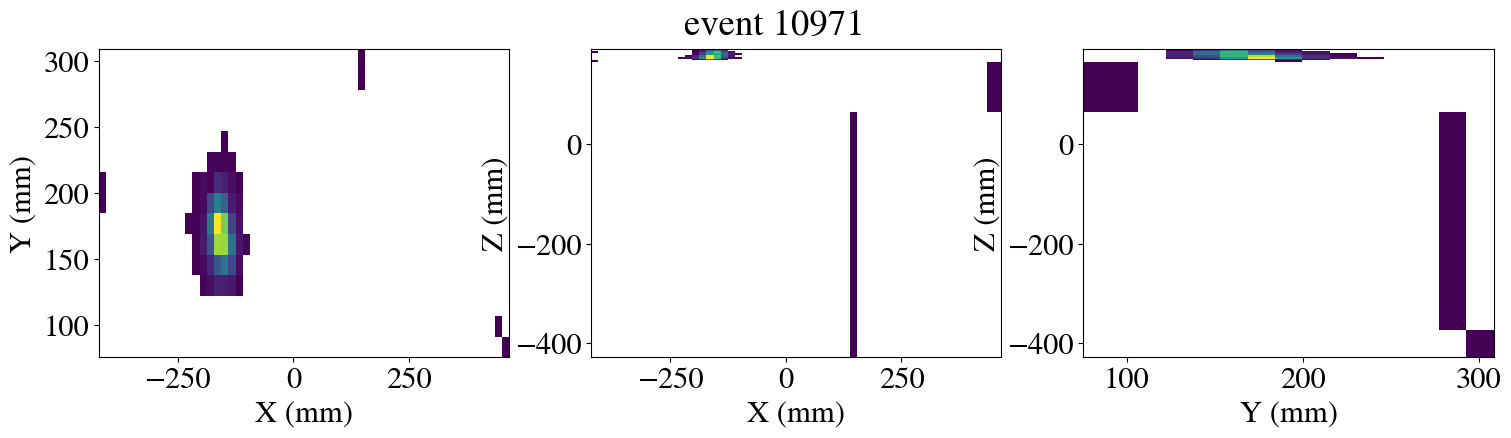

EVENT 11139
Total energy 0.18 MeV

Time spent in cut_over_Q: 0.32154417037963867 s
Time spent in drop_isolated: 0.13050103187561035 s
Post cuts and drops:
Total energy 0.18 MeV


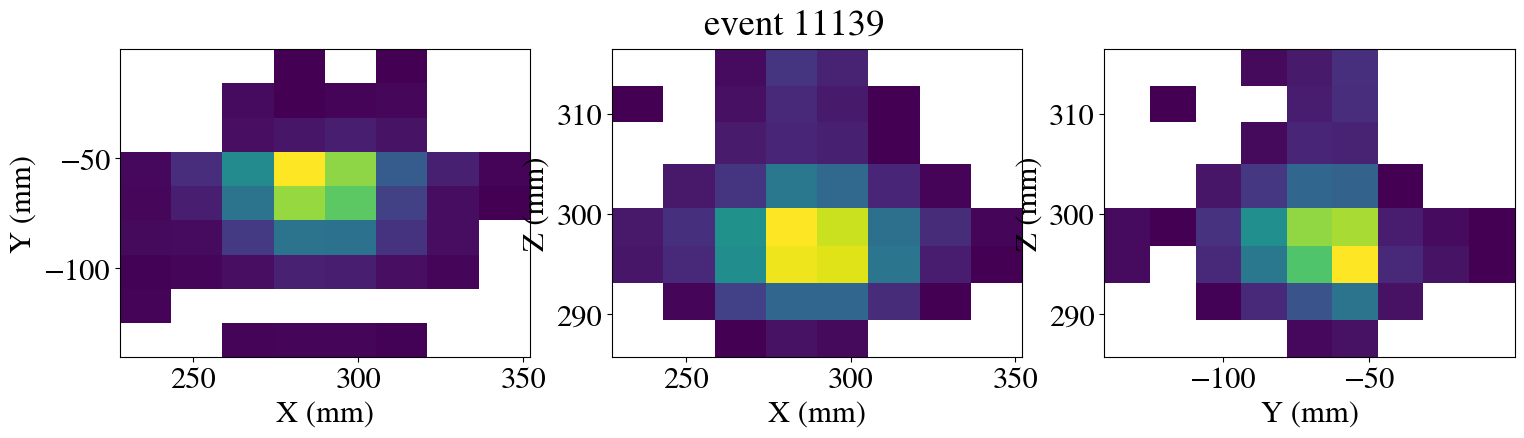

EVENT 11153
Total energy 0.55 MeV

Time spent in cut_over_Q: 0.19155526161193848 s
Time spent in drop_isolated: 0.09784674644470215 s
Post cuts and drops:
Total energy 0.55 MeV


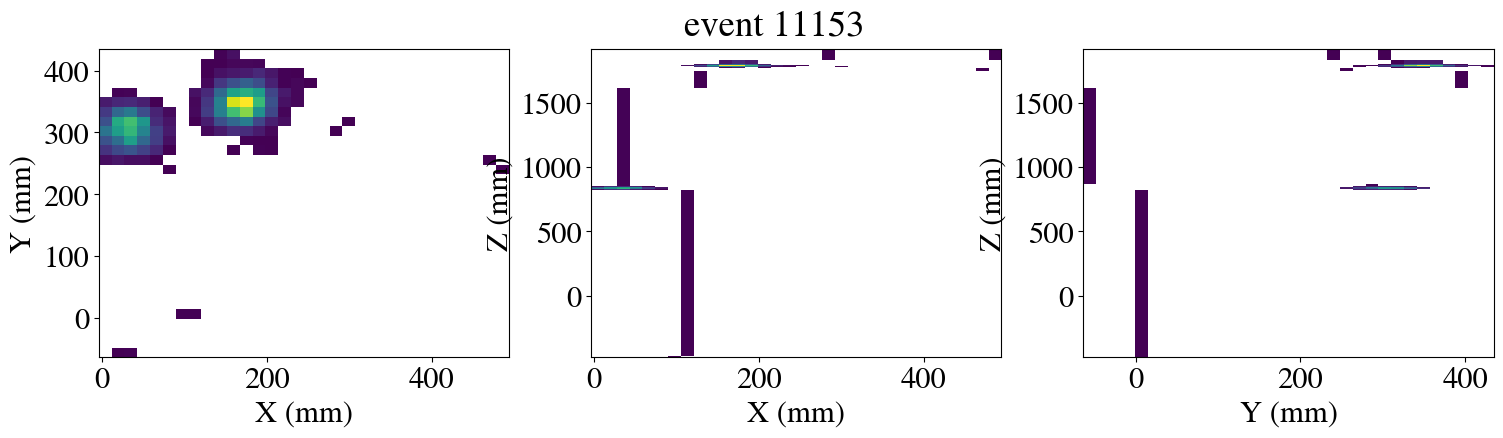

EVENT 11307
Total energy 0.27 MeV

Time spent in cut_over_Q: 0.22820615768432617 s
Time spent in drop_isolated: 0.07687211036682129 s
Post cuts and drops:
Total energy 0.27 MeV


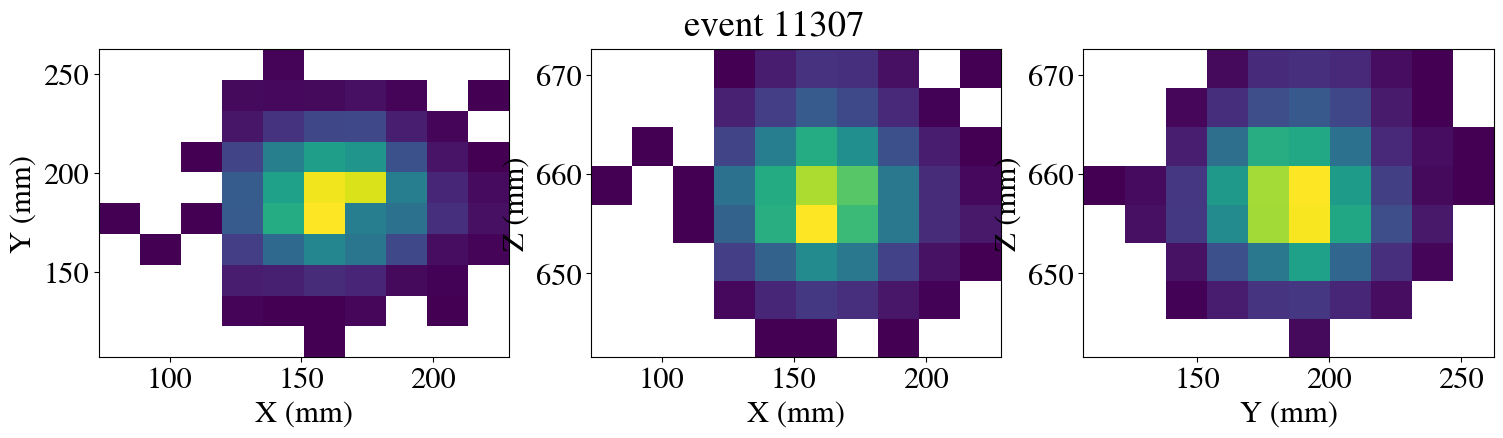

EVENT 11356
Total energy 0.79 MeV

Time spent in cut_over_Q: 0.14018726348876953 s


/gluster/data/next/software/miniconda/envs/IC-3.8-2024-06-08/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time spent in drop_isolated: 0.06628704071044922 s
Post cuts and drops:
Total energy 0.79 MeV


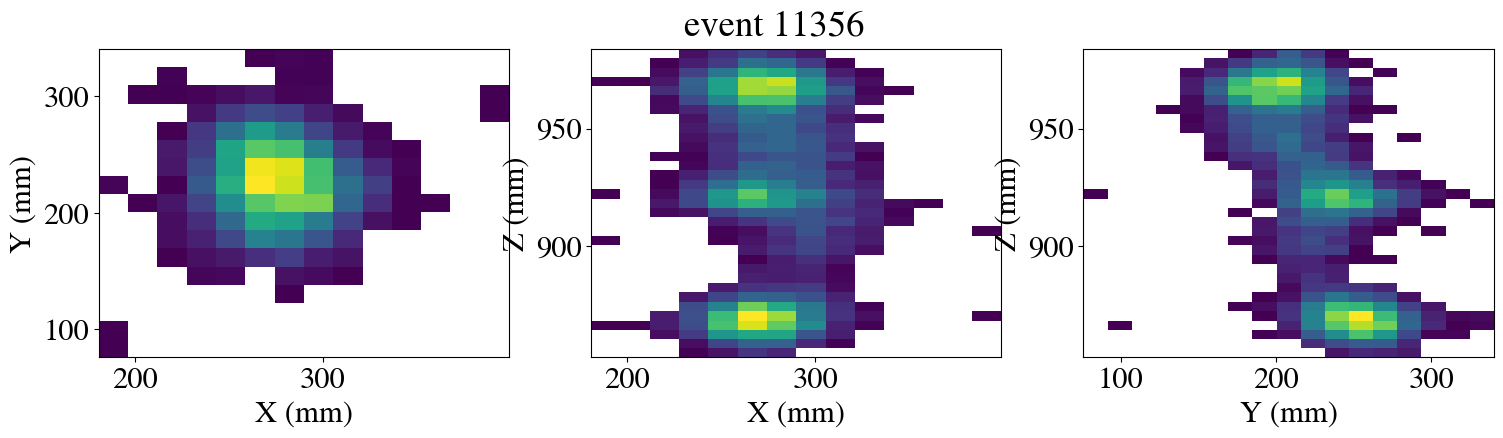

EVENT 11398
Total energy 0.47 MeV

Time spent in cut_over_Q: 0.20772385597229004 s
Time spent in drop_isolated: 0.021310806274414062 s
Post cuts and drops:
Total energy 0.47 MeV


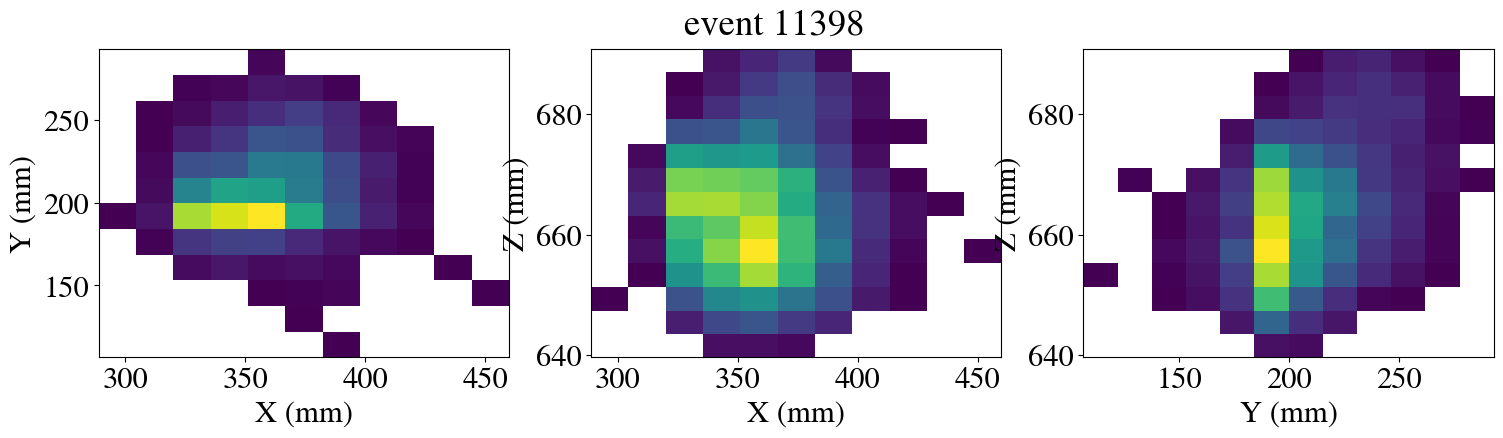

In [76]:
cut_and_plot(soph_hdst)

In [72]:
events = soph_hdst.event.unique()

# choose an event
evt_hdst = soph_hdst[soph_hdst.event == events[0]]
display(evt_hdst)

pitch = 15.55

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,7793,1.742935e+09,0,1.413382,22.949532,1,119.825,-464.375,0.0,0.0,-209.841406,6.042296,-0.832301,-1.0,-0.000002,-1,-1.0
1,7793,1.742935e+09,0,1.413382,22.949532,1,10.975,461.625,0.0,0.0,-209.841406,5.246290,-0.722655,-1.0,-0.000002,-1,-1.0
2,7793,1.742935e+09,0,1.413382,22.949532,1,212.125,-31.975,0.0,0.0,-209.841406,5.464381,-0.752696,-1.0,-0.000002,-1,-1.0
3,7793,1.742935e+09,0,1.413382,22.949532,1,196.575,260.475,0.0,0.0,-209.841406,5.288045,-0.728406,-1.0,-0.000002,-1,-1.0
4,7793,1.742935e+09,0,1.413382,22.949532,1,366.625,322.175,0.0,0.0,-209.841406,5.903080,-0.813125,-1.0,NaN,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,7793,1.742935e+09,52,68.195255,35.015647,1,-220.275,414.975,0.0,0.0,2439.553750,5.846226,-0.632926,-1.0,-0.000002,-1,-1.0
2225,7793,1.742935e+09,52,68.195255,35.015647,1,319.975,292.075,0.0,0.0,2439.553750,5.424018,-0.587217,-1.0,-0.000002,-1,-1.0
2226,7793,1.742935e+09,52,68.195255,35.015647,1,458.925,229.875,0.0,0.0,2439.553750,7.299050,-0.790212,-1.0,NaN,-1,-1.0
2227,7793,1.742935e+09,52,68.195255,35.015647,1,-420.425,-109.225,0.0,0.0,2444.005250,8.513470,-2.214337,-1.0,-0.000009,-1,-1.0


In [39]:
print('======================')
print(f'EVENT {evt_hdst.event.unique()[0]}')
print(f'Total energy {evt_hdst.Ec.sum():.2f} MeV')
print('======================\n')

# apply cuts and all that
hits_cut = coref.timefunc(cut_sensors)(evt_hdst.copy())
hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())

print(f'Post cuts and drops:')
print(f'Total energy {hits_drop.Ec.sum():.2f} MeV')

EVENT 1528
Total energy 0.44 MeV

Time spent in cut_over_Q: 0.36640048027038574 s
Time spent in drop_isolated: 0.1811506748199463 s
Post cuts and drops:
Total energy 0.45 MeV


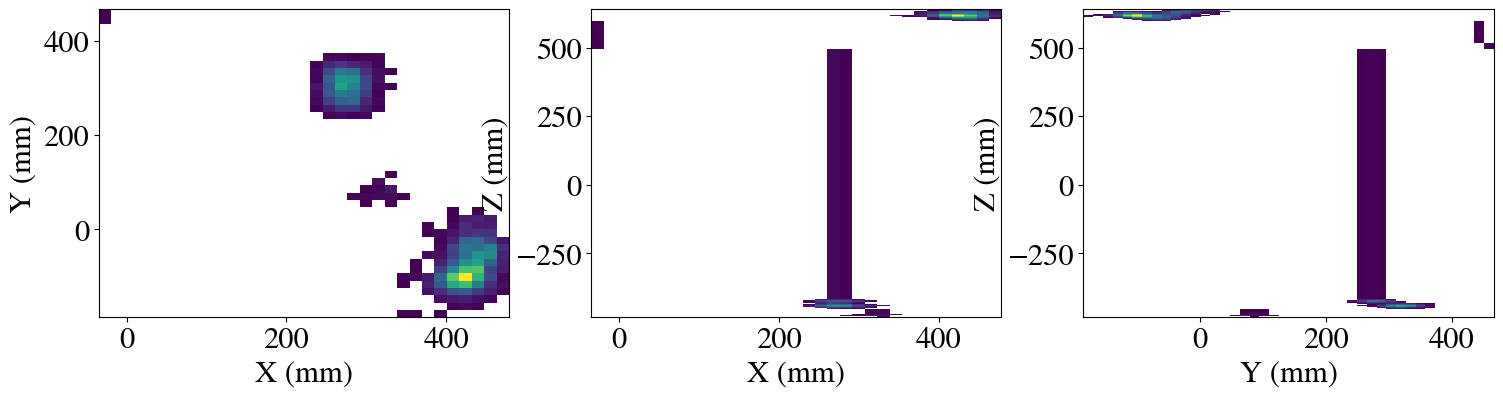

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

hits = hits_drop
# then applying transformations to convert to 'SiPM outputs'

xx = np.arange(hits.X.min(), hits.X.max() + pitch, pitch)
yy = np.arange(hits.Y.min(), hits.Y.max() + pitch, pitch)
zz = hits.Z.unique()

axes[0].hist2d(hits.X, hits.Y, bins=[xx, yy], weights=hits.Q, cmin=0.0001)#, cmap = 'Viridis');
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(hits.X, hits.Z, bins=[xx, zz], weights=hits.Q, cmin=0.0001)#, cmap = 'RdGy');
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(hits.Y, hits.Z, bins=[yy, zz], weights=hits.Q, cmin=0.0001)#, cmap = 'RdGy');
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');


EVENT 1528
Total energy 0.44 MeV

Time spent in cut_over_Q: 0.36658239364624023 s
Time spent in drop_isolated: 0.17523741722106934 s
Post cuts and drops:
Total energy 0.45 MeV


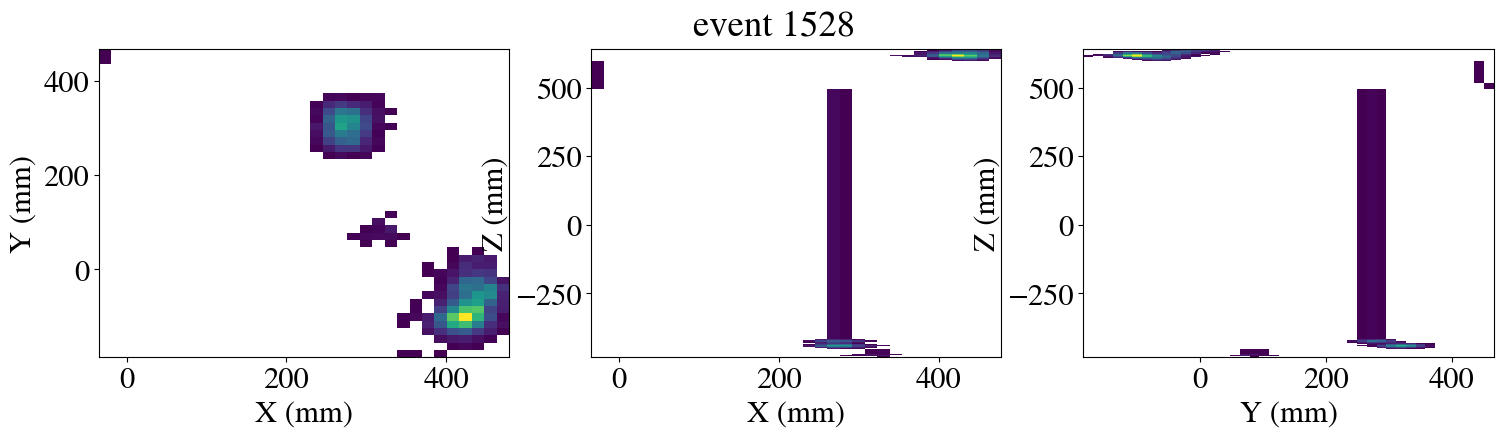

EVENT 1556
Total energy 0.23 MeV

Time spent in cut_over_Q: 0.2774505615234375 s
Time spent in drop_isolated: 0.08945226669311523 s
Post cuts and drops:
Total energy 0.24 MeV


/gluster/data/next/software/miniconda/envs/IC-3.8-2024-06-08/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


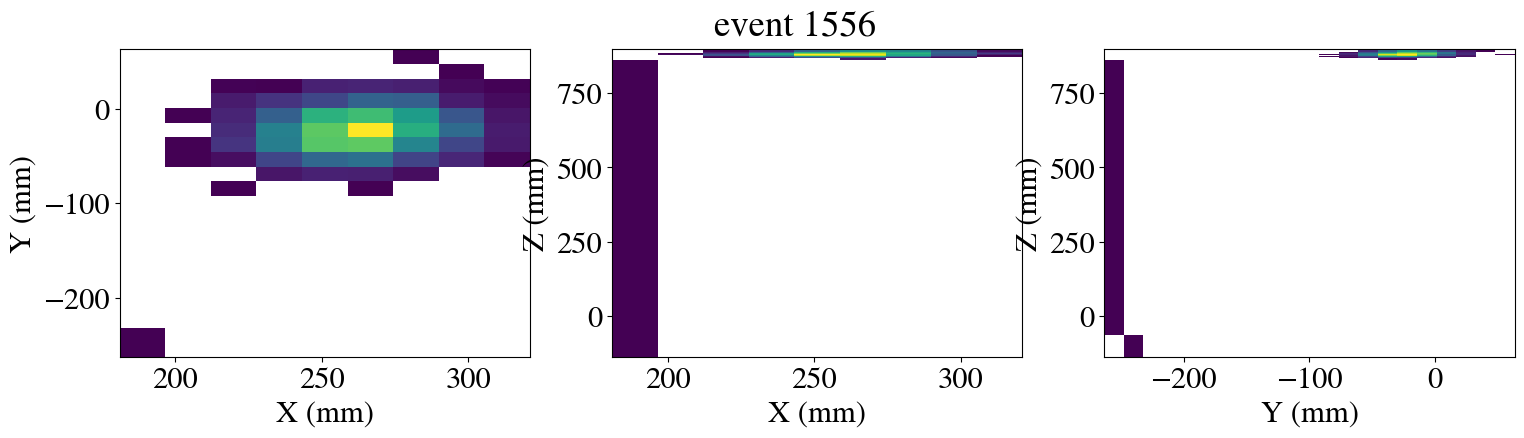

EVENT 1612
Total energy 0.17 MeV

Time spent in cut_over_Q: 0.36057043075561523 s
Time spent in drop_isolated: 0.11882758140563965 s
Post cuts and drops:
Total energy 0.17 MeV


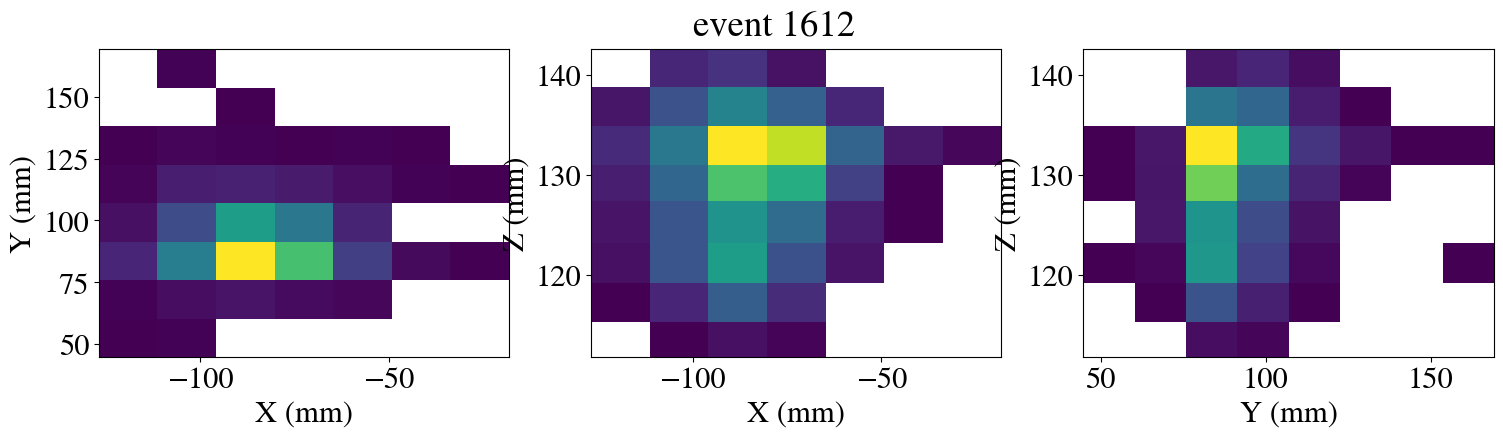

EVENT 1626
Total energy 0.27 MeV

Time spent in cut_over_Q: 0.06495022773742676 s
Time spent in drop_isolated: 0.03263092041015625 s
Post cuts and drops:
Total energy 0.27 MeV


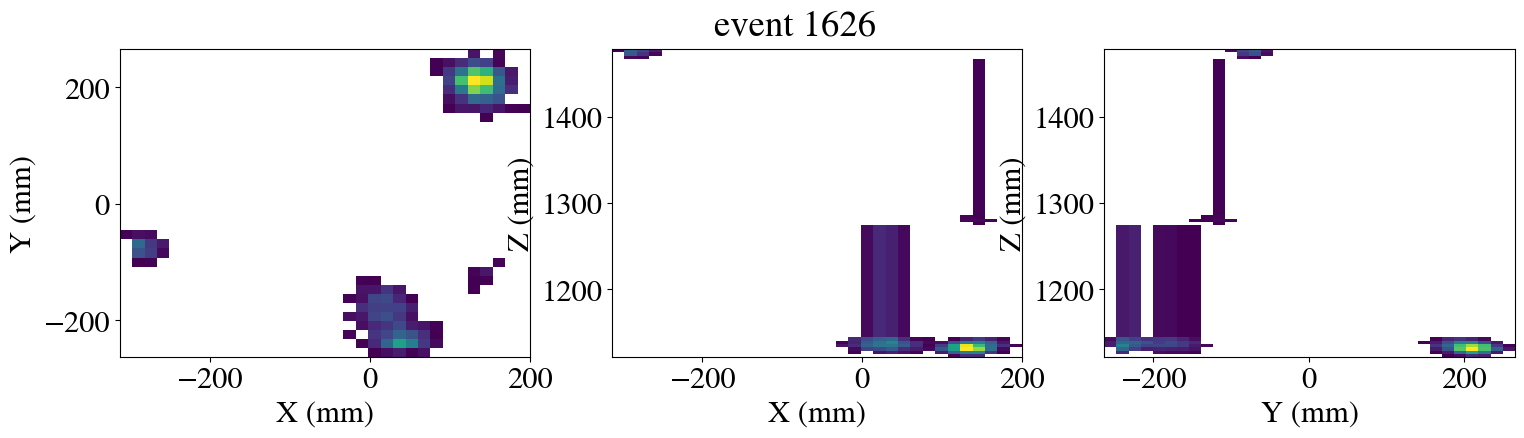

EVENT 1794
Total energy 0.33 MeV

Time spent in cut_over_Q: 0.15873026847839355 s
Time spent in drop_isolated: 0.04869270324707031 s
Post cuts and drops:
Total energy 0.33 MeV


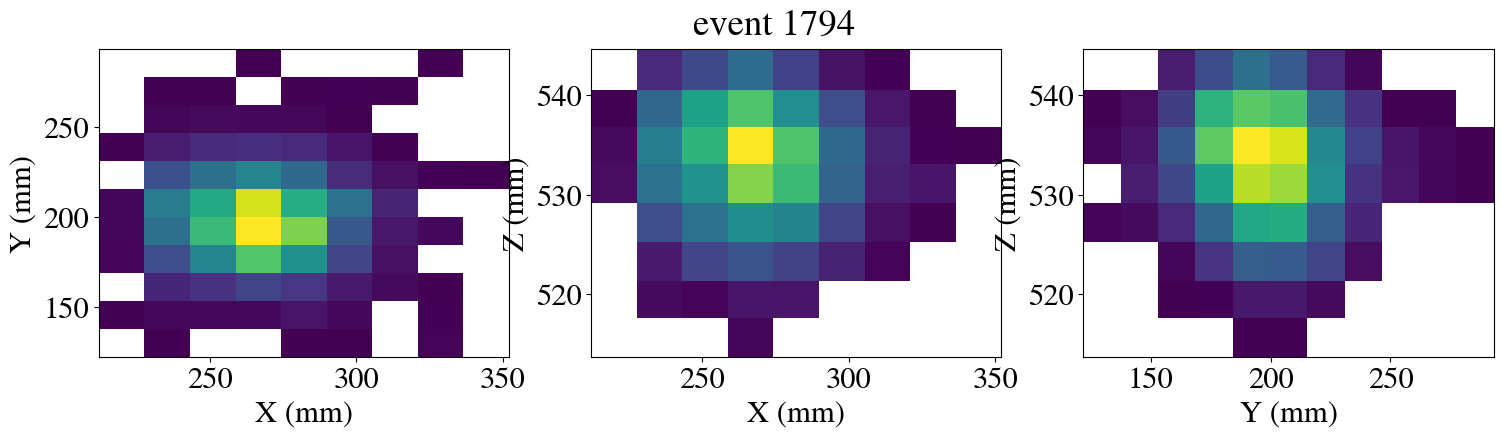

EVENT 1864
Total energy 0.39 MeV

Time spent in cut_over_Q: 0.15134716033935547 s
Time spent in drop_isolated: 0.05427885055541992 s
Post cuts and drops:
Total energy 0.39 MeV


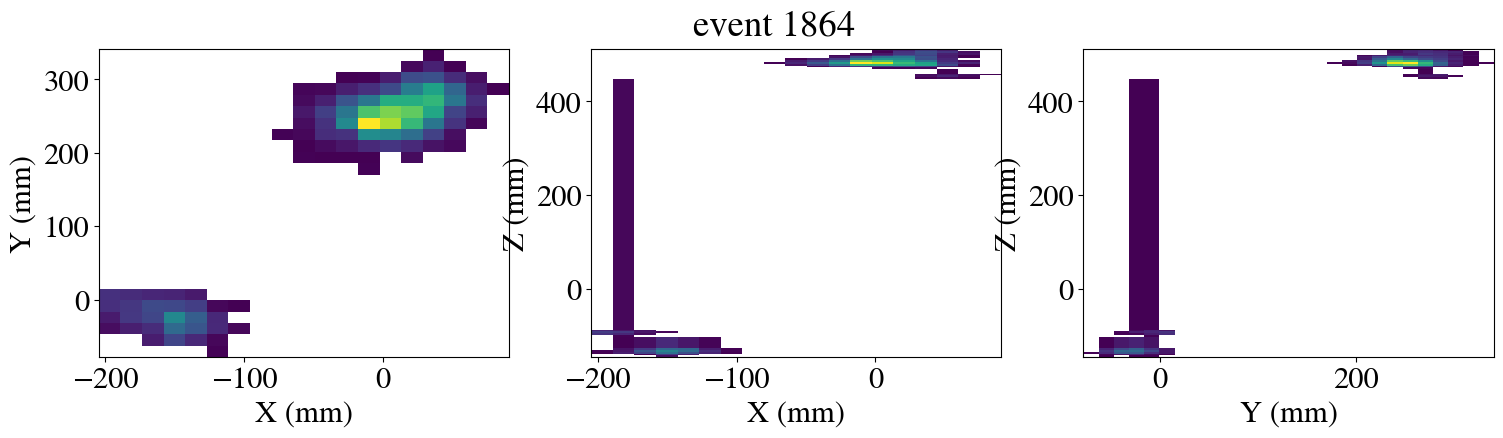

EVENT 1892
Total energy 0.51 MeV

Time spent in cut_over_Q: 0.03423452377319336 s
Time spent in drop_isolated: 0.02976202964782715 s
Post cuts and drops:
Total energy 0.51 MeV


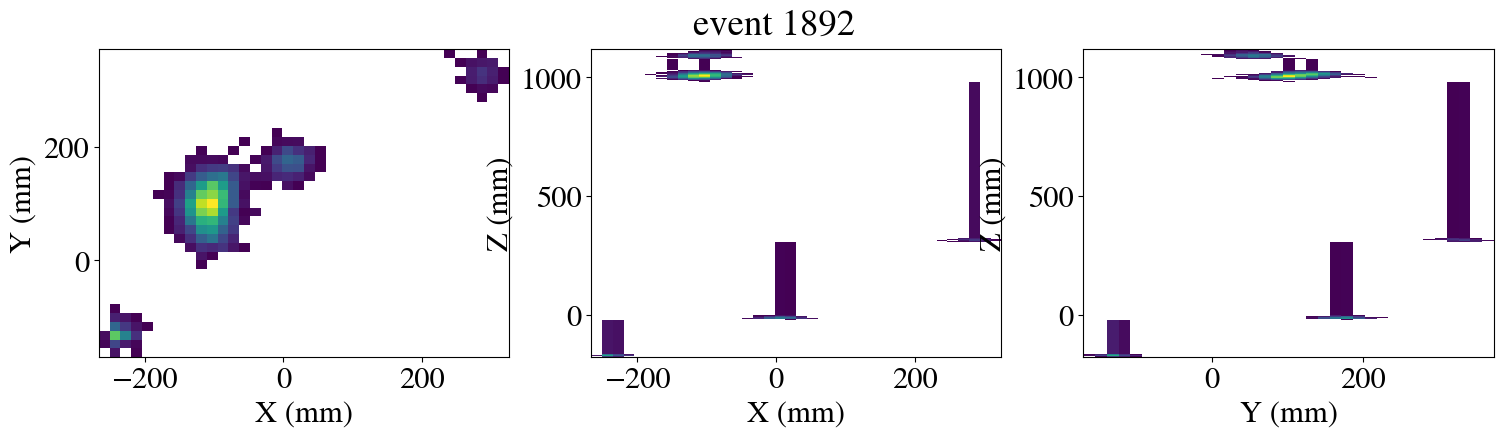

EVENT 1962
Total energy 0.88 MeV

Time spent in cut_over_Q: 0.018848180770874023 s
Time spent in drop_isolated: 0.034200429916381836 s
Post cuts and drops:
Total energy 0.88 MeV


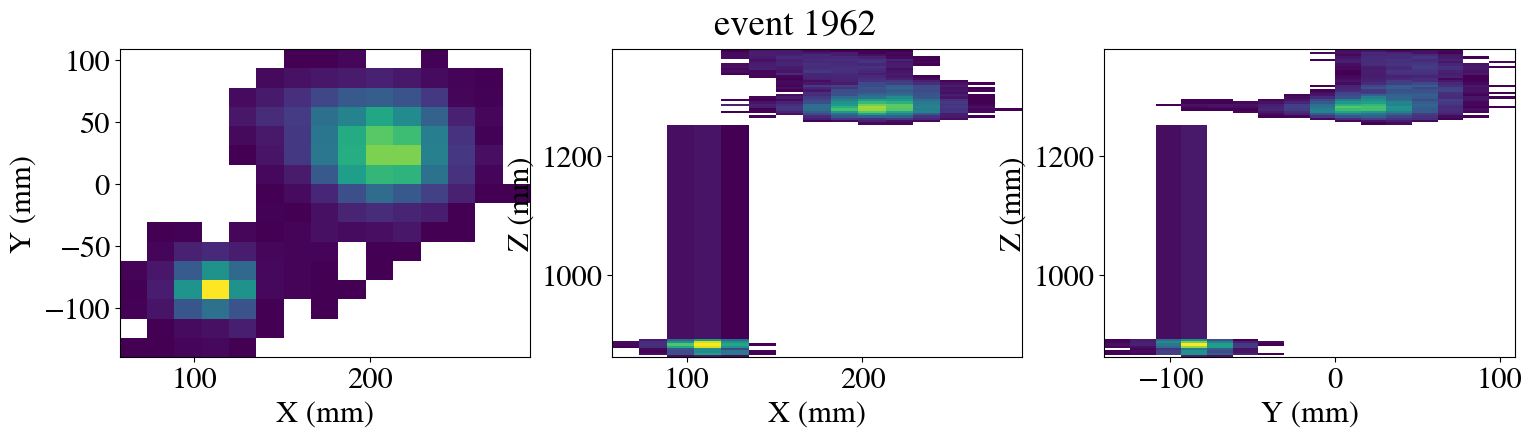